In [1]:
import numpy as np
from PIL import Image

In [2]:
image = Image.open("scotch/img1.png")
image = image.convert("L")
width, height = image.size

In [3]:
array = np.zeros((1 * height * width), dtype=float).reshape((1, height, width))
array.shape

(1, 244, 324)

In [4]:
pixels = np.array(image)
array[0, :, :] = pixels

In [5]:
array.shape

(1, 244, 324)

In [6]:
def resize_grayscale_image(image, target_size=(200, 200), crop_bottom=False):
    """
    Redimensionne une image en gardant les proportions. Le recadrage peut se faire au centre de l'image ou en bas.
    :param image: Image à redimensionner (height, width)
    :param target_size: Taille de l'image redimensionnée
    :param crop_bottom: Position du recadrage en bas de l'image (par défaut le recadrage est centré)
    """
    target_height, target_width = target_size
    image_height, image_width = image.shape

    # Calcul l'offset horizontal (entre le bord gauche de l'image et le bord gauche du crop) pour centrer l'image
    if target_width > image_width:
        left_crop = 0
        target_width = image_width
        print(f"Warning: target width is larger than image width ({target_size[1]} > {image_width}). Width will not be cropped.")
    else:
        left_crop = (image_width - target_width) // 2

    # Calcul l'offset vertical (entre le bord haut de l'image et le bord haut du crop) en fonction de la position du crop ("center ou lower")
    if target_height > image_height:
        top_crop = 0
        target_height = image_height
        print(f"Warning: target height is larger than image height ({target_size[0]} > {image_height}). Height will not be cropped.")
    else:
        top_crop = image_height - target_height
        if crop_bottom == False:
            top_crop = top_crop // 2

    # Crop l'image
    image = image[top_crop:top_crop + target_height, left_crop:left_crop + target_width]
    return np.expand_dims(image, axis=0)

In [7]:
from lab2 import init
pathfinder = init()

In [8]:
resized_array = resize_grayscale_image(array[0], target_size=(200, 200), crop_bottom=False)
points = pathfinder.detect_line(resized_array)

In [12]:
resized_array.shape

(1, 200, 200)

In [9]:
points

(96, 200, 90, 150)

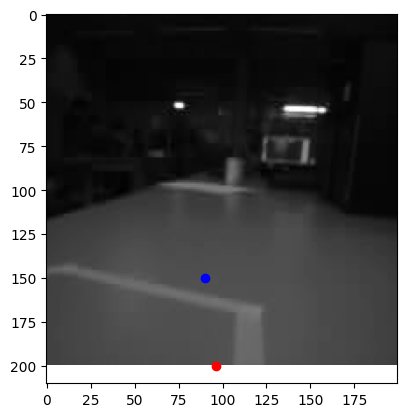

In [10]:
import matplotlib.pyplot as plt

plt.imshow(resized_array[0], cmap='gray')
plt.plot(points[:2][0], points[:2][1], 'ro')
plt.plot(points[2:][0], points[2:][1], 'bo')
plt.show()
plt.show()

In [11]:
pathfinder.detect_line(array)

(153, 200, 162, 150)